# Run TM52 analysis on data

Analysis code to undertake CIBSE TM52 analysis. Codebase forms part of the PhD thesis of Adam Tyler. It is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY.

analyse_data(T_range,dir_path,dir_name,oat_dir,group,start_date,end_date,resample_rate = '10min',show_plots = True,return_data = 'ee',print_output=True)

*T_range* - plus/minus adaptive band range (2 - spaces occupied by very sensitive and fragile persons, 3 - for new buildings and renovations, 4 - used for existing buildings)
dir_path - base directory containing dir_name
dir_name - folder in base directory containing sensor data
oat_dir - folder containing OAT.csv (outdoor temperature sensor data)
group - human readable name for dir_path, printed to output
start_date - string (iso datetime format) - start date/time for analysis
end_date - string (iso datetime format) - end date/time for analysis
resample_rate - int (minutes) - (optional, default = 10) - resample rate for sensor data (down sampling only)
show_plots - (optional, default = True) - enable showing of plots
return_data - (optional, default = 'ee') - type of data to return ('ee' = excess energy (float) if available, 'df' = full dataframe, 'null' = nothing)
print_output - (optional, default = True) - enable showing of output


In [6]:
from TM52_analysis_functions import analyse_data, generate_table
from os import scandir
from pathlib import Path

Data expected to be provided in the following structure

└── <top>
    └── <data>
        └── <group_name>
            ├── OAT.csv                             # Outside air temperature data for all rooms
            └── <room_name>
                ├── '<room_name>_Air.csv'           # (required) - air temperatures measured in room - csv file containing two column. Default expectations for columns: column 1: {name:"Time", format:"unix timestamp"}, column 2: {name:"Air Temp - Lascar (high res)", format:float}
                ├── '<room_name>_Heating.csv'       # (optional) flow temperature to radiator measured in room - csv file containing two column. Default expectations for columns: column 1: {name:"Time","Heating on (high res)", format:float}
                ├── '<room_name>_Humidity.csv'       # (optional) relative humidity measured in room - csv file containing two column. Default expectations for columns: column 1: {name:"Time","Humidity - Lascar (high res)", format:float}
                ├── '<room_name>_Radiance.csv'       # (optional) mean radiant temperature measured in room - csv file containing two column. Default expectations for columns: column 1: {name:"Time","Radiance (high res)", format:float}
                ├── no_heating                       # (optional - required if '<room_name>_Heating.csv' not present) empty file
            ┋

Room - 2-1 - study
Green (score < 1) - 5980.8  hours out of  6244.7 ,  95.8 % of time
Amber (score >= 1 and < 2) - 264.0  hours out of  6244.7 ,  4.2 % of time
Red (score >= 2) - 0.0  hours out of  6244.7 ,  0.0 % of time
% of time IAT above: OT-4 93.2 , OT-3 90.0 , OT-2 78.6 , OT-1 53.1 , OT 24.2
% of time IAT above CC temp:  60.2
missing data -> 99.995 % OAT data available ( 2 data-points out of 38880 ),  100.0 % IAT data available ( 0 data-points out of 38880 ),  100.0 % RAD data available ( 0 data-points out of 38880 )
% of time whilst heating on IAT above: OT-4 92.9 , OT-3 89.5 , OT-2 80.9 , OT-1 60.9 , OT 23.1
% of time whilst heating on IAT above CC temp: 38.2
% of time whilst heating off IAT above: OT-4 93.4 ,  OT-3 90.2 , OT-2 77.5 , OT-1 49.4 , OT 24.7
% of time whilst heating off IAT above CC temp: 70.6
Green whilst heating active (score < 1) - 1919.3  hours out of  1938.2 ,  99.0 % of time
Amber whilst heating active (score >= 1 and < 2) - 18.8  hours out of  1938.2 ,  99.0

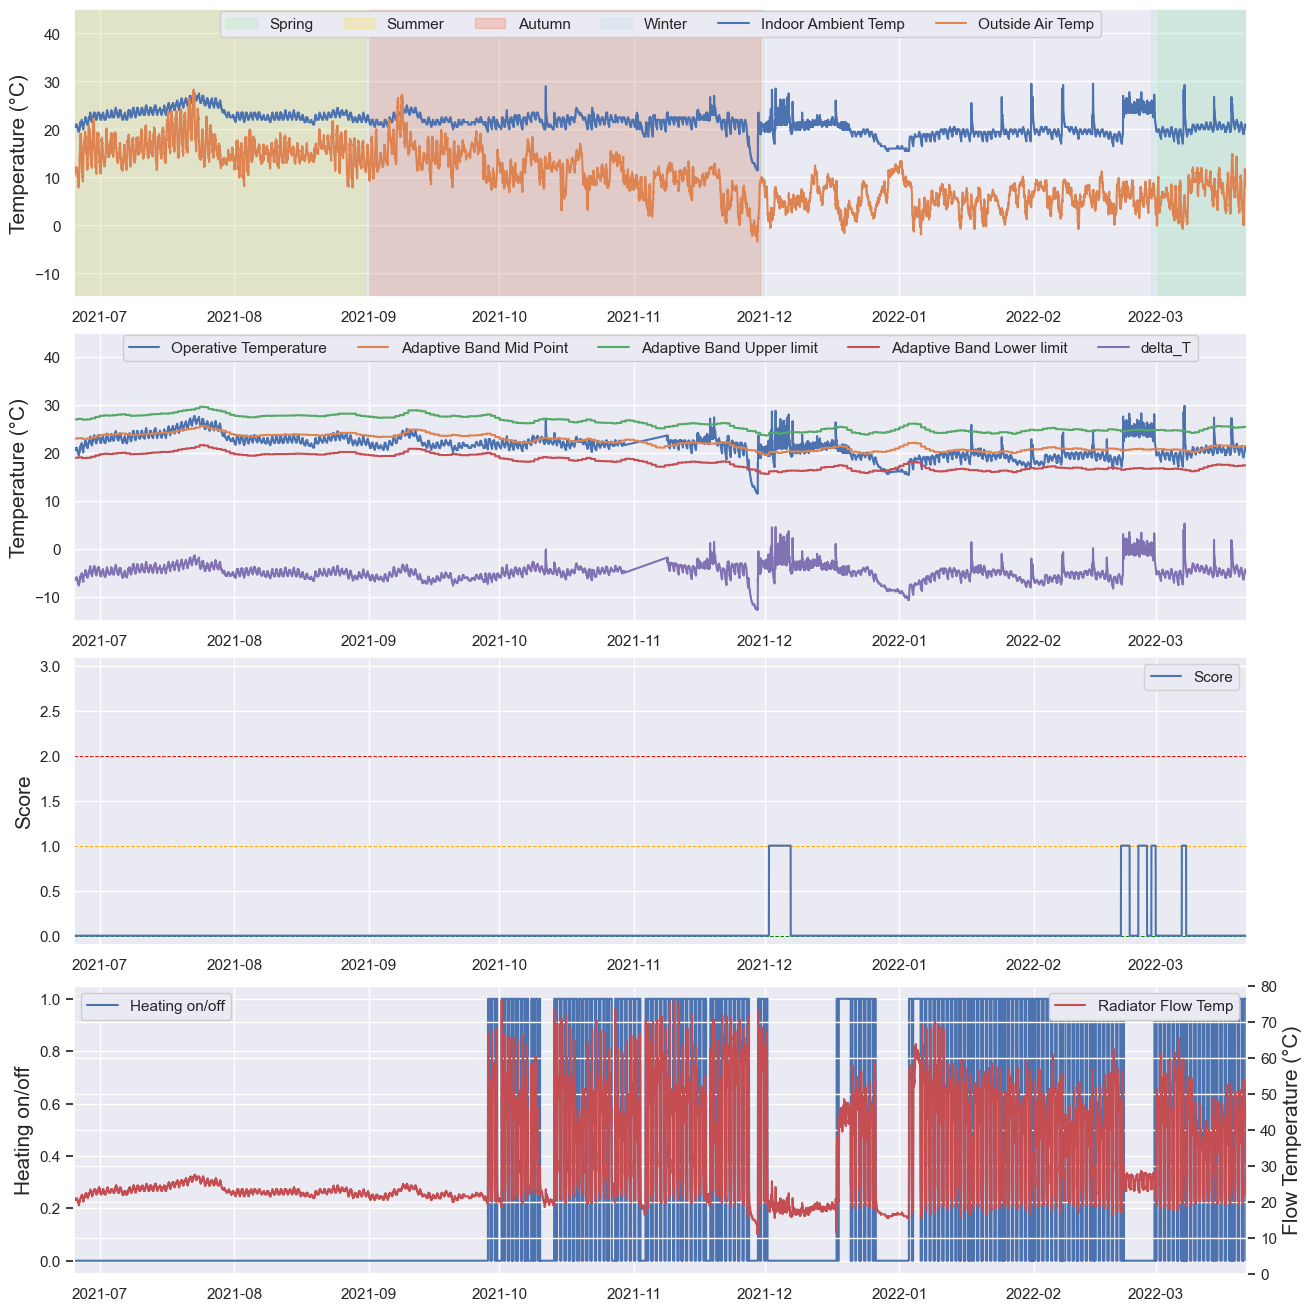

Total excess energy 339.11 kWh


In [12]:
# Study data - prints summary statistics and generates plots for TM52 analysis for each individual room
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
group = '<group_name>'              # group_name for analysis - name of the parent folder for the data - see structure given above
start_date = '2021-06-25 00:00:00'  # start date for analysis
end_date = '2022-03-21 23:59:59'    # end date for analysis
we = 0                              # starting excess energy in kWh
save_plots = True                   # save plots to disk

top = '<top>'                       # top folder for the analysis - see structure given above
T_range = 4                         # TM52 band - For most existing buildings, a band of ±4°K would be used, with ±3° K being used for new buildings, and ±2° K being used for buildings such as hospitals or care homes that are occupied by individuals who are very sensitive or fragile
sub_dir = 'data\\'+group
for dir in scandir(sub_dir):
    dir_path = Path(top + '\\' + dir.path)
    if dir_path.is_dir():
        we = we + analyse_data(T_range=T_range,dir_path=dir_path,dir_name=dir.name,oat_dir=top + '\\' + sub_dir,group=group,start_date=start_date,end_date=end_date,save_plots=save_plots,calculate_OT=False)

print("Total excess energy",round(we,2),"kWh")

In [5]:
# generate table data - generates summary tables for full TM52 analysis (all rooms)
start_date = '2021-06-25 00:00:00'  # start date for analysis
end_date = '2022-03-21 23:59:59'    # end date for analysis
base_folder = '<top>\<data>'        # data folder for the analysis - see structure given above
num_decimal_places = 8              # number of decimal places for the table data (percentages)
num_decimal_places_big = 8          # number of decimal places for the table data (values)
location = '<location>'             # human readable location name for the analysis - used in the table header
rooms_base_folder = '<group_name>'  # group_name for analysis - name of the parent folder for the data - see structure given above
output_to_file = 'html'             # output to file - 'html', 'pdf' or None for no output
monthly=True                        # generate monthly data in tables - True or False for just overall data

generate_table(base_folder=base_folder,location=location,start_date=start_date,end_date=end_date,num_decimal_places=num_decimal_places,num_decimal_places_big=num_decimal_places_big,output_to_file=output_to_file,monthly=monthly,rooms_base_folder=rooms_base_folder,get_BMS=False,calculate_OT=False,file_name_prep=location +' - ')

HTML file created - Summary_Table - table 1.html
HTML file created - Summary_Table - table 2.html
HTML file created - Summary_Table - table 3 chunk 1.html
HTML file created - Summary_Table - table 3 chunk 2.html
HTML file created - Summary_Table - table 3 chunk 3.html
